# Census Income Project

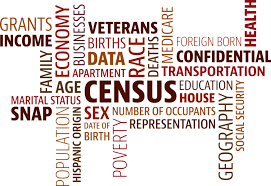

## Problem Statement:




This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

## Description of fnlwgt (final weight)


The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



### Importing all important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [33]:
#printing my cloumn names
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [34]:
#info of my dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Checking for null values

In [35]:
#checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### Checking for null values with the help of heatmap

<AxesSubplot:>

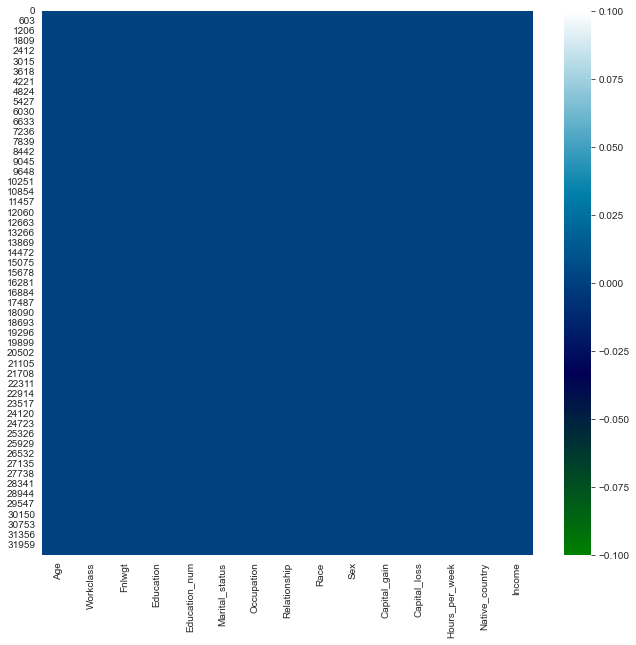

In [115]:
plt.figure(figsize=(11,10))
sns.heatmap(df.isna(), cmap='ocean')

Hence we can see that no null values present in our dataset.

In [36]:
#shape of my dataset
df.shape

(32560, 15)

### Checking unique values

In [37]:
#unique features in my dataset
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

### Statistical description of data

In [55]:
#statistical view of my dataset
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [39]:
#Looping my object coulmns and printing all my nunique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' +str(df[column].nunique()))
        print(df[column].value_counts())
        print('_______________________________________________')

Workclass : 9
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
_______________________________________________
Education : 16
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
_______________________________________________
Marital_status : 7
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent   

### Exploration of the dataset (EDA )


### univariate Analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' ?'),
  Text(6, 0, ' Self-emp-inc'),
  Text(7, 0, ' Without-pay'),
  Text(8, 0, ' Never-worked')])

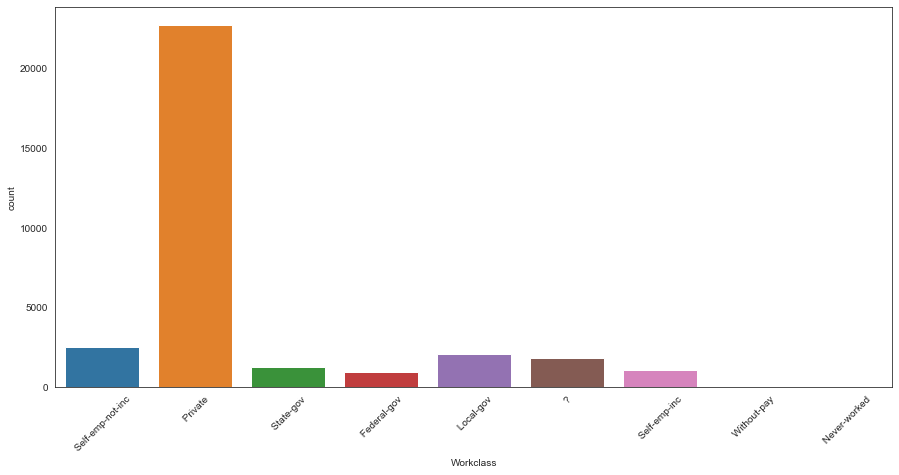

In [117]:
plt.figure(figsize = (15,7))
sns.countplot(df.Workclass)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

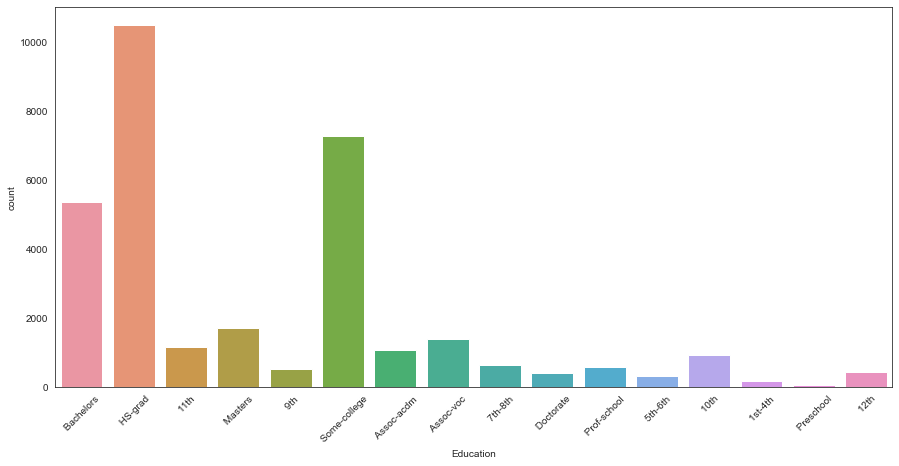

In [118]:
plt.figure(figsize = (15,7))
sns.countplot(df.Education)
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

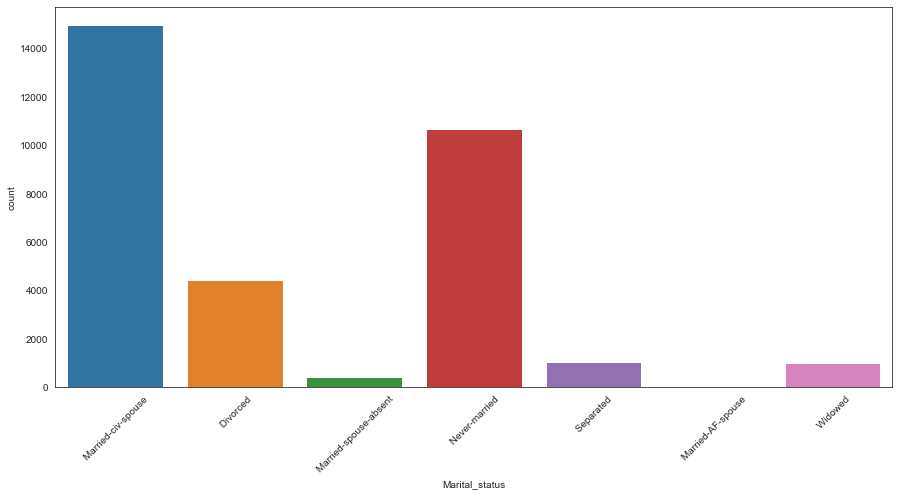

In [119]:
plt.figure(figsize = (15,7))
sns.countplot(df.Marital_status)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' ?'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Armed-Forces'),
  Text(14, 0, ' Priv-house-serv')])

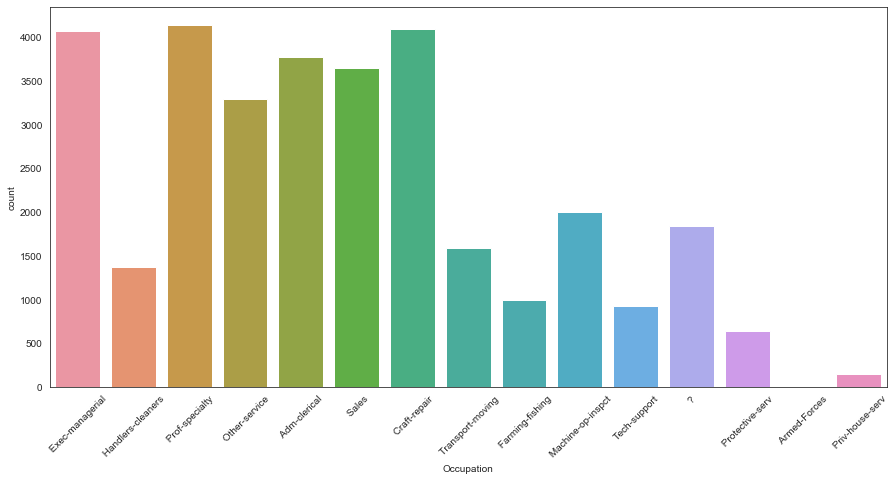

In [121]:
plt.figure(figsize = (15,7))
sns.countplot(df.Occupation)
plt.xticks(rotation = 45)

(array([0, 1]), [Text(0, 0, ' Male'), Text(1, 0, ' Female')])

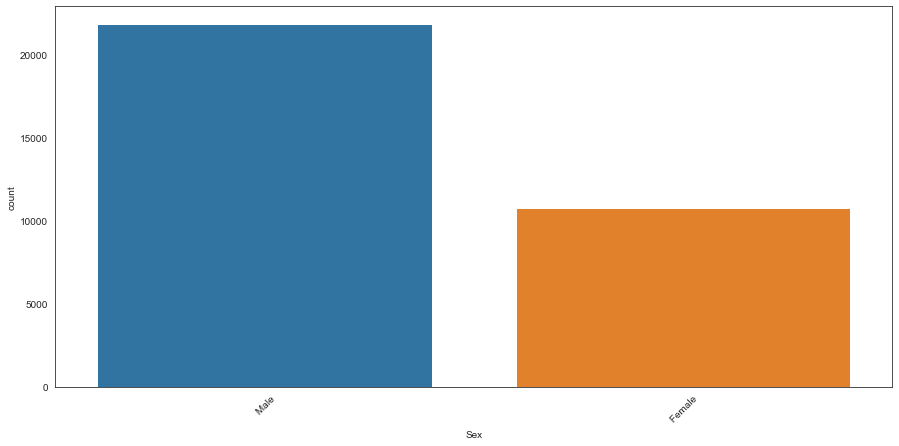

In [122]:
plt.figure(figsize = (15,7))
sns.countplot(df.Sex)
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' ?'),
  Text(5, 0, ' Mexico'),
  Text(6, 0, ' South'),
  Text(7, 0, ' Puerto-Rico'),
  Text(8, 0, ' Honduras'),
  Text(9, 0, ' England'),
  Text(10, 0, ' Canada'),
  Text(11, 0, ' Germany'),
  Text(12, 0, ' Iran'),
  Text(13, 0, ' Philippines'),
  Text(14, 0, ' Italy'),
  Text(15, 0, ' Poland'),
  Text(16, 0, ' Columbia'),
  Text(17, 0, ' Cambodia'),
  Text(18, 0, ' Thailand'),
  Text(19, 0, ' Ecuador'),
  Text(20, 0, ' Laos'),
  Text(21, 0, ' Taiwan'),
  Text(22, 0, ' Haiti'),
  Text(23, 0, ' Portugal'),
  Text(24, 0, ' Dominican-Republic'),
  Text(25, 0, ' El-Salvador'),
  Text(26, 0, ' France'),
  Text(27, 0, ' Guatemala'),
  Text(28, 0, ' China'),
  Text(29, 0, ' Japan'),
  

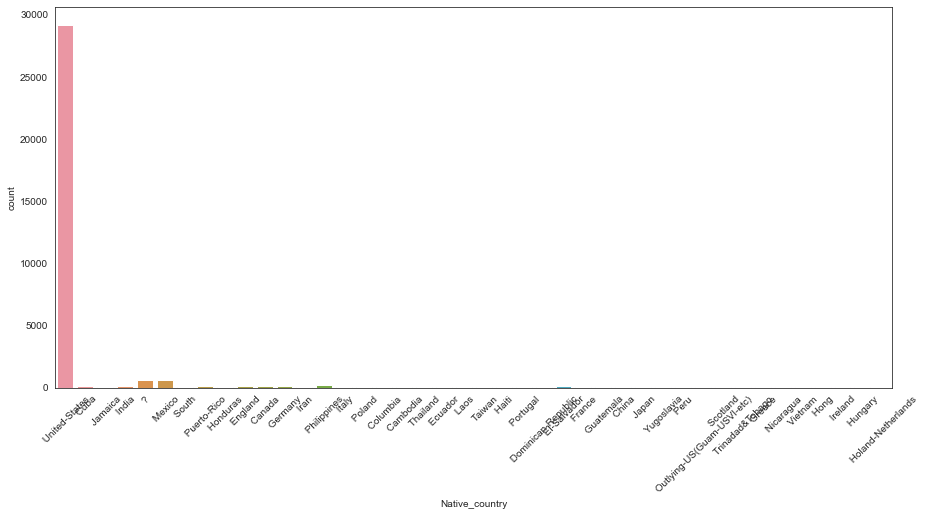

In [123]:
plt.figure(figsize = (15,7))
sns.countplot(df.Native_country)
plt.xticks(rotation = 45)

Mostly are from United Srtates of America.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

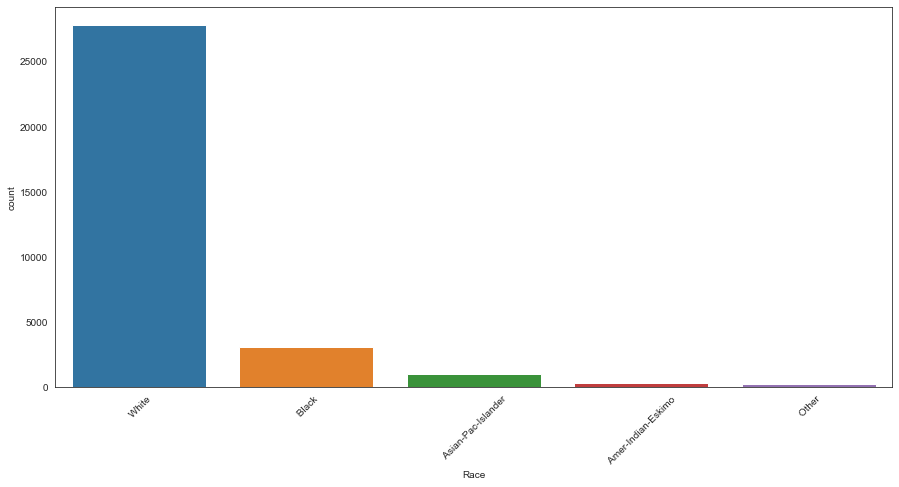

In [124]:
plt.figure(figsize = (15,7))
sns.countplot(df.Race)
plt.xticks(rotation = 45)

Most people in the dataset belong to white race followed by black.

In [40]:
df.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

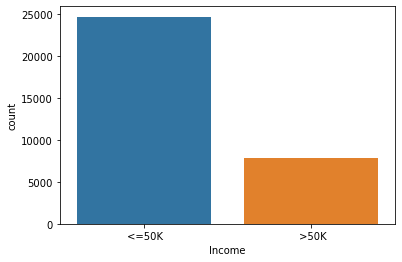

In [41]:
sns.countplot(x='Income',data=df)

As we can see mostly people have income less than or equals to 50K

<function matplotlib.pyplot.show(close=None, block=None)>

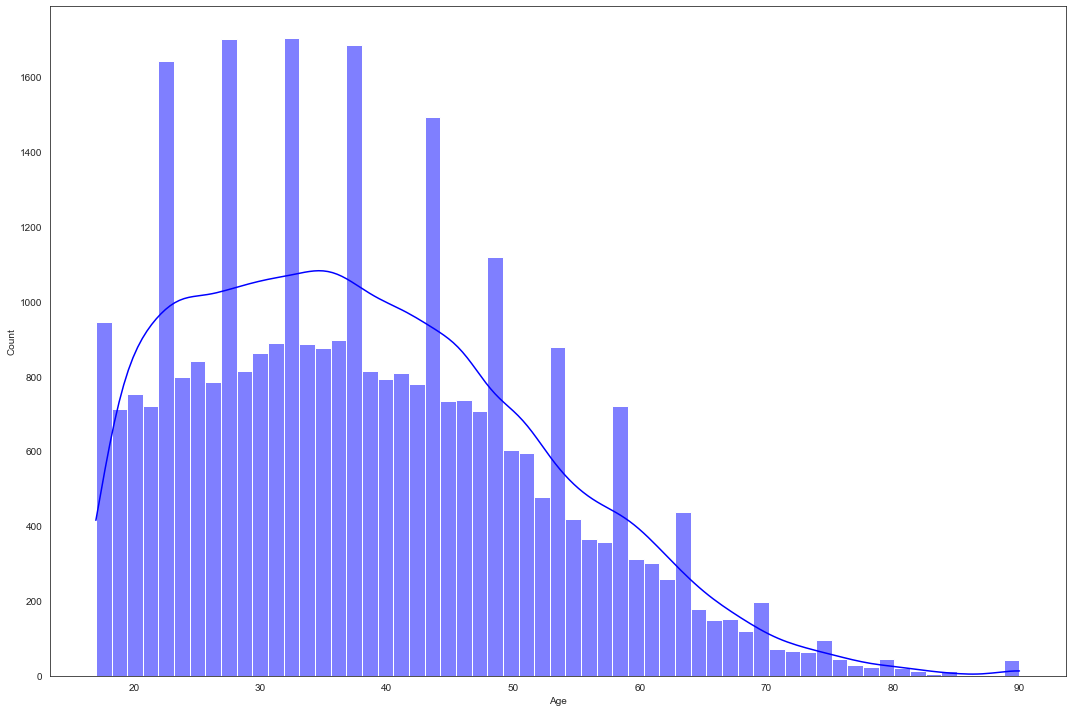

In [128]:
plt.figure(figsize = (15,10))
sns.histplot(df.Age, kde='True ', color='blue')
plt.tight_layout()
plt.show

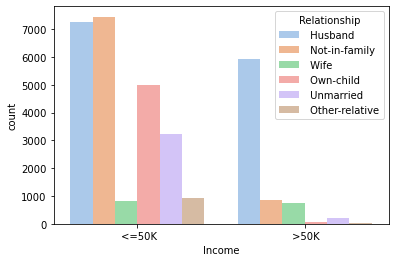

In [42]:
#countplot of diffrent condition
sns.countplot(df['Income'], palette='pastel', hue='Relationship', data=df);
import warnings
warnings.filterwarnings('ignore')

Husbands have mostly income greater than 50K followed by not in family and wife

### Bivariate Analysis

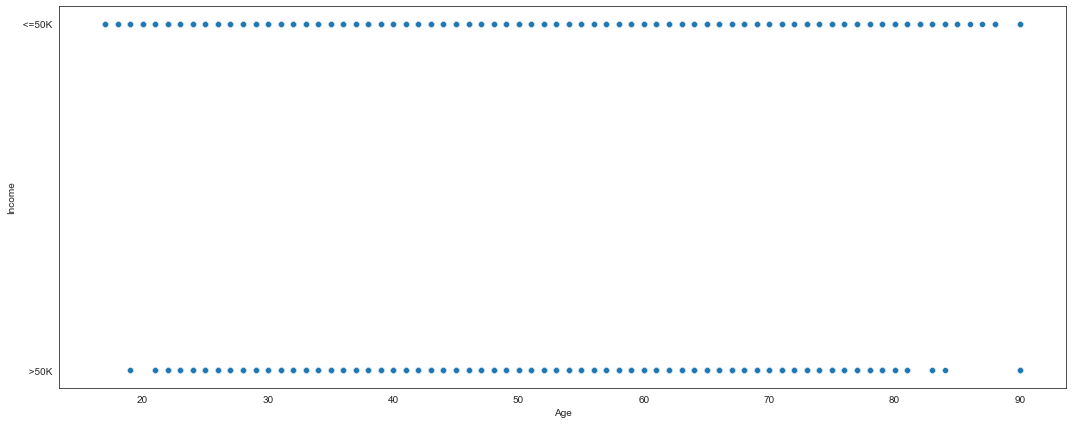

In [133]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x ='Age', y ='Income')
plt.tight_layout()

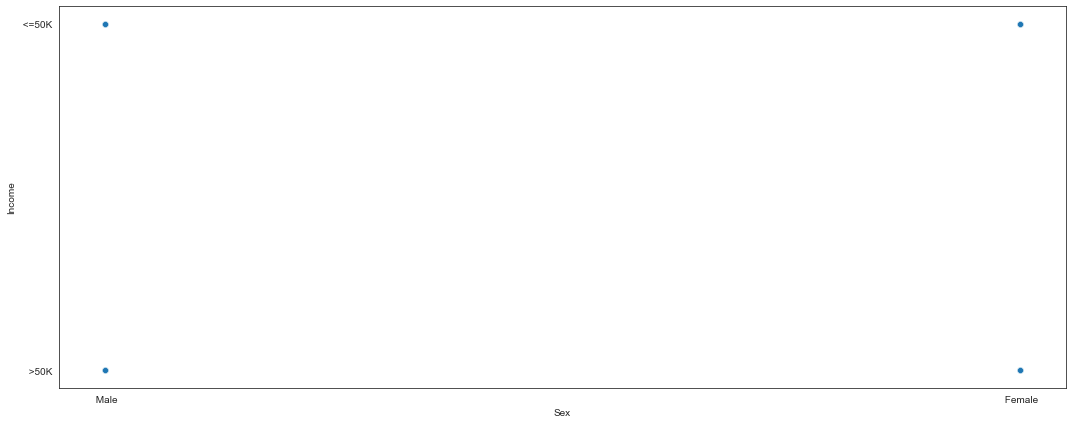

In [134]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x ='Sex', y ='Income')
plt.tight_layout()

### Multivariate analysis

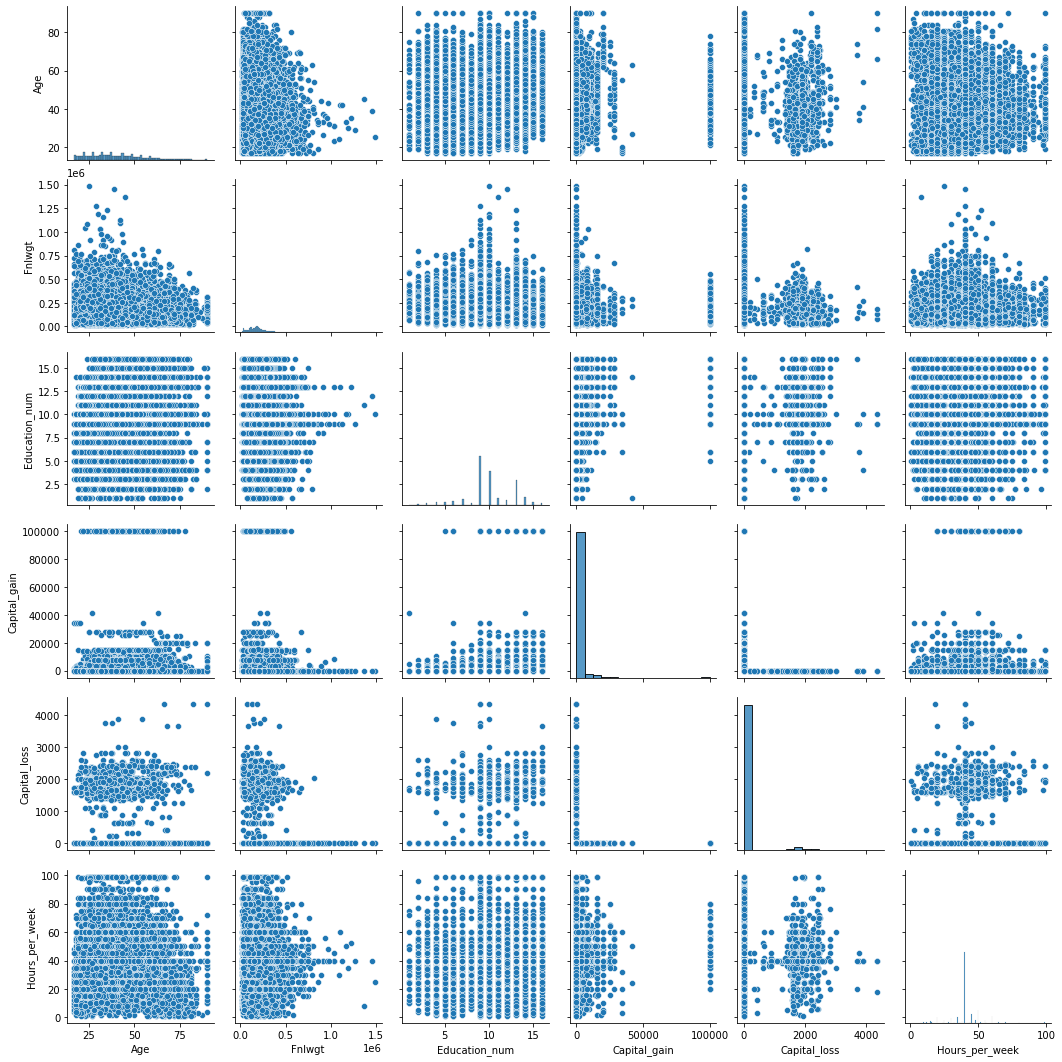

In [43]:
#pairplot view
sns.pairplot(df)

### Feature Engineering

In [44]:
#filling '?' with values
df['Workclass'] = df['Workclass'].replace('?', 'Private')
df['Occupation'] = df['Occupation'].replace('?', 'Prof-specialty')
df['Native_country'] = df['Native_country'].replace('?', 'United-States')

In [45]:
# education Category
df.Education= df.Education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.Education = df.Education.replace('HS-grad', 'high school')
df.Education = df.Education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.Education = df.Education.replace('Bachelors', 'undergrad')
df.Education = df.Education.replace('Masters', 'grad')
df.Education = df.Education.replace('Doctorate', 'doc')

In [46]:
#martial status
df['Marital_status']= df['Marital_status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['Marital_status']= df['Marital_status'].replace(['Never-married'], 'not-married')
df['Marital_status']= df['Marital_status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [47]:
# income
df.Income = df.Income.replace('<=50K', 0)
df.Income = df.Income.replace('>50K', 1)

In [56]:
#correlation matrix
corr_mat = df.corr()

corr_mat

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


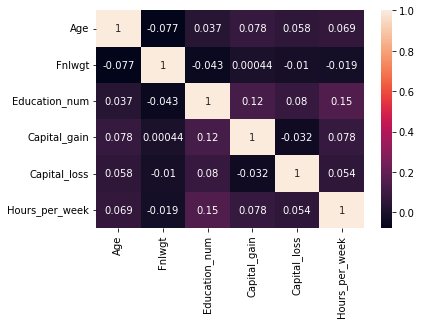

In [57]:
#heatmap for my corr_mat
sns.heatmap(corr_mat, annot=True);

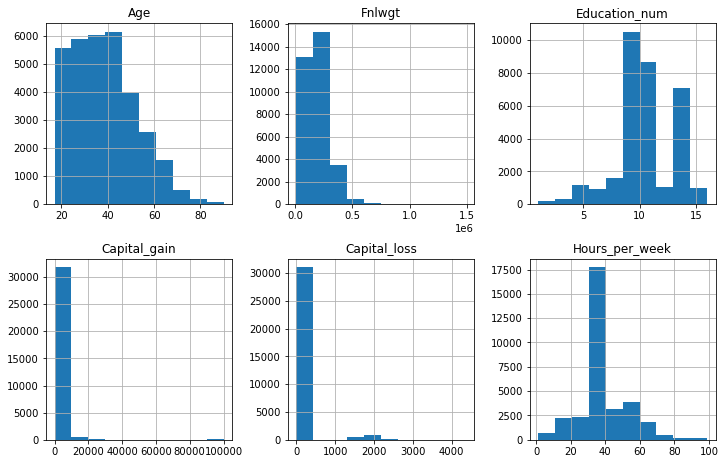

In [58]:
#histogram for my dataset
df.hist(figsize=(12,12), layout=(3,3), sharex=False);


### Checking for outliers

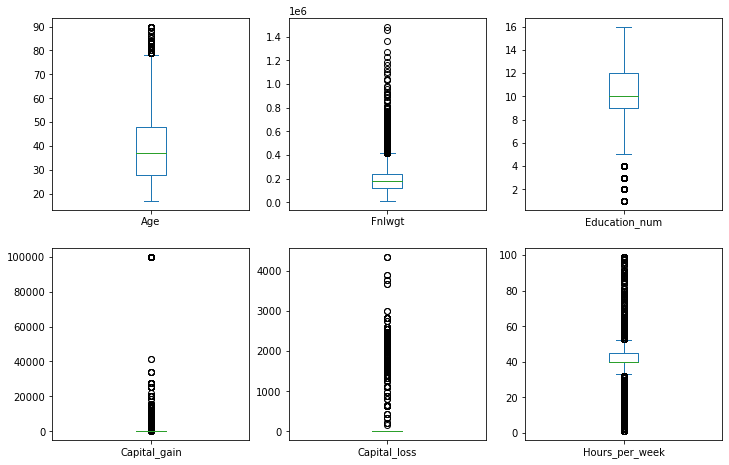

In [59]:
#boxplot to remove outliers
df.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

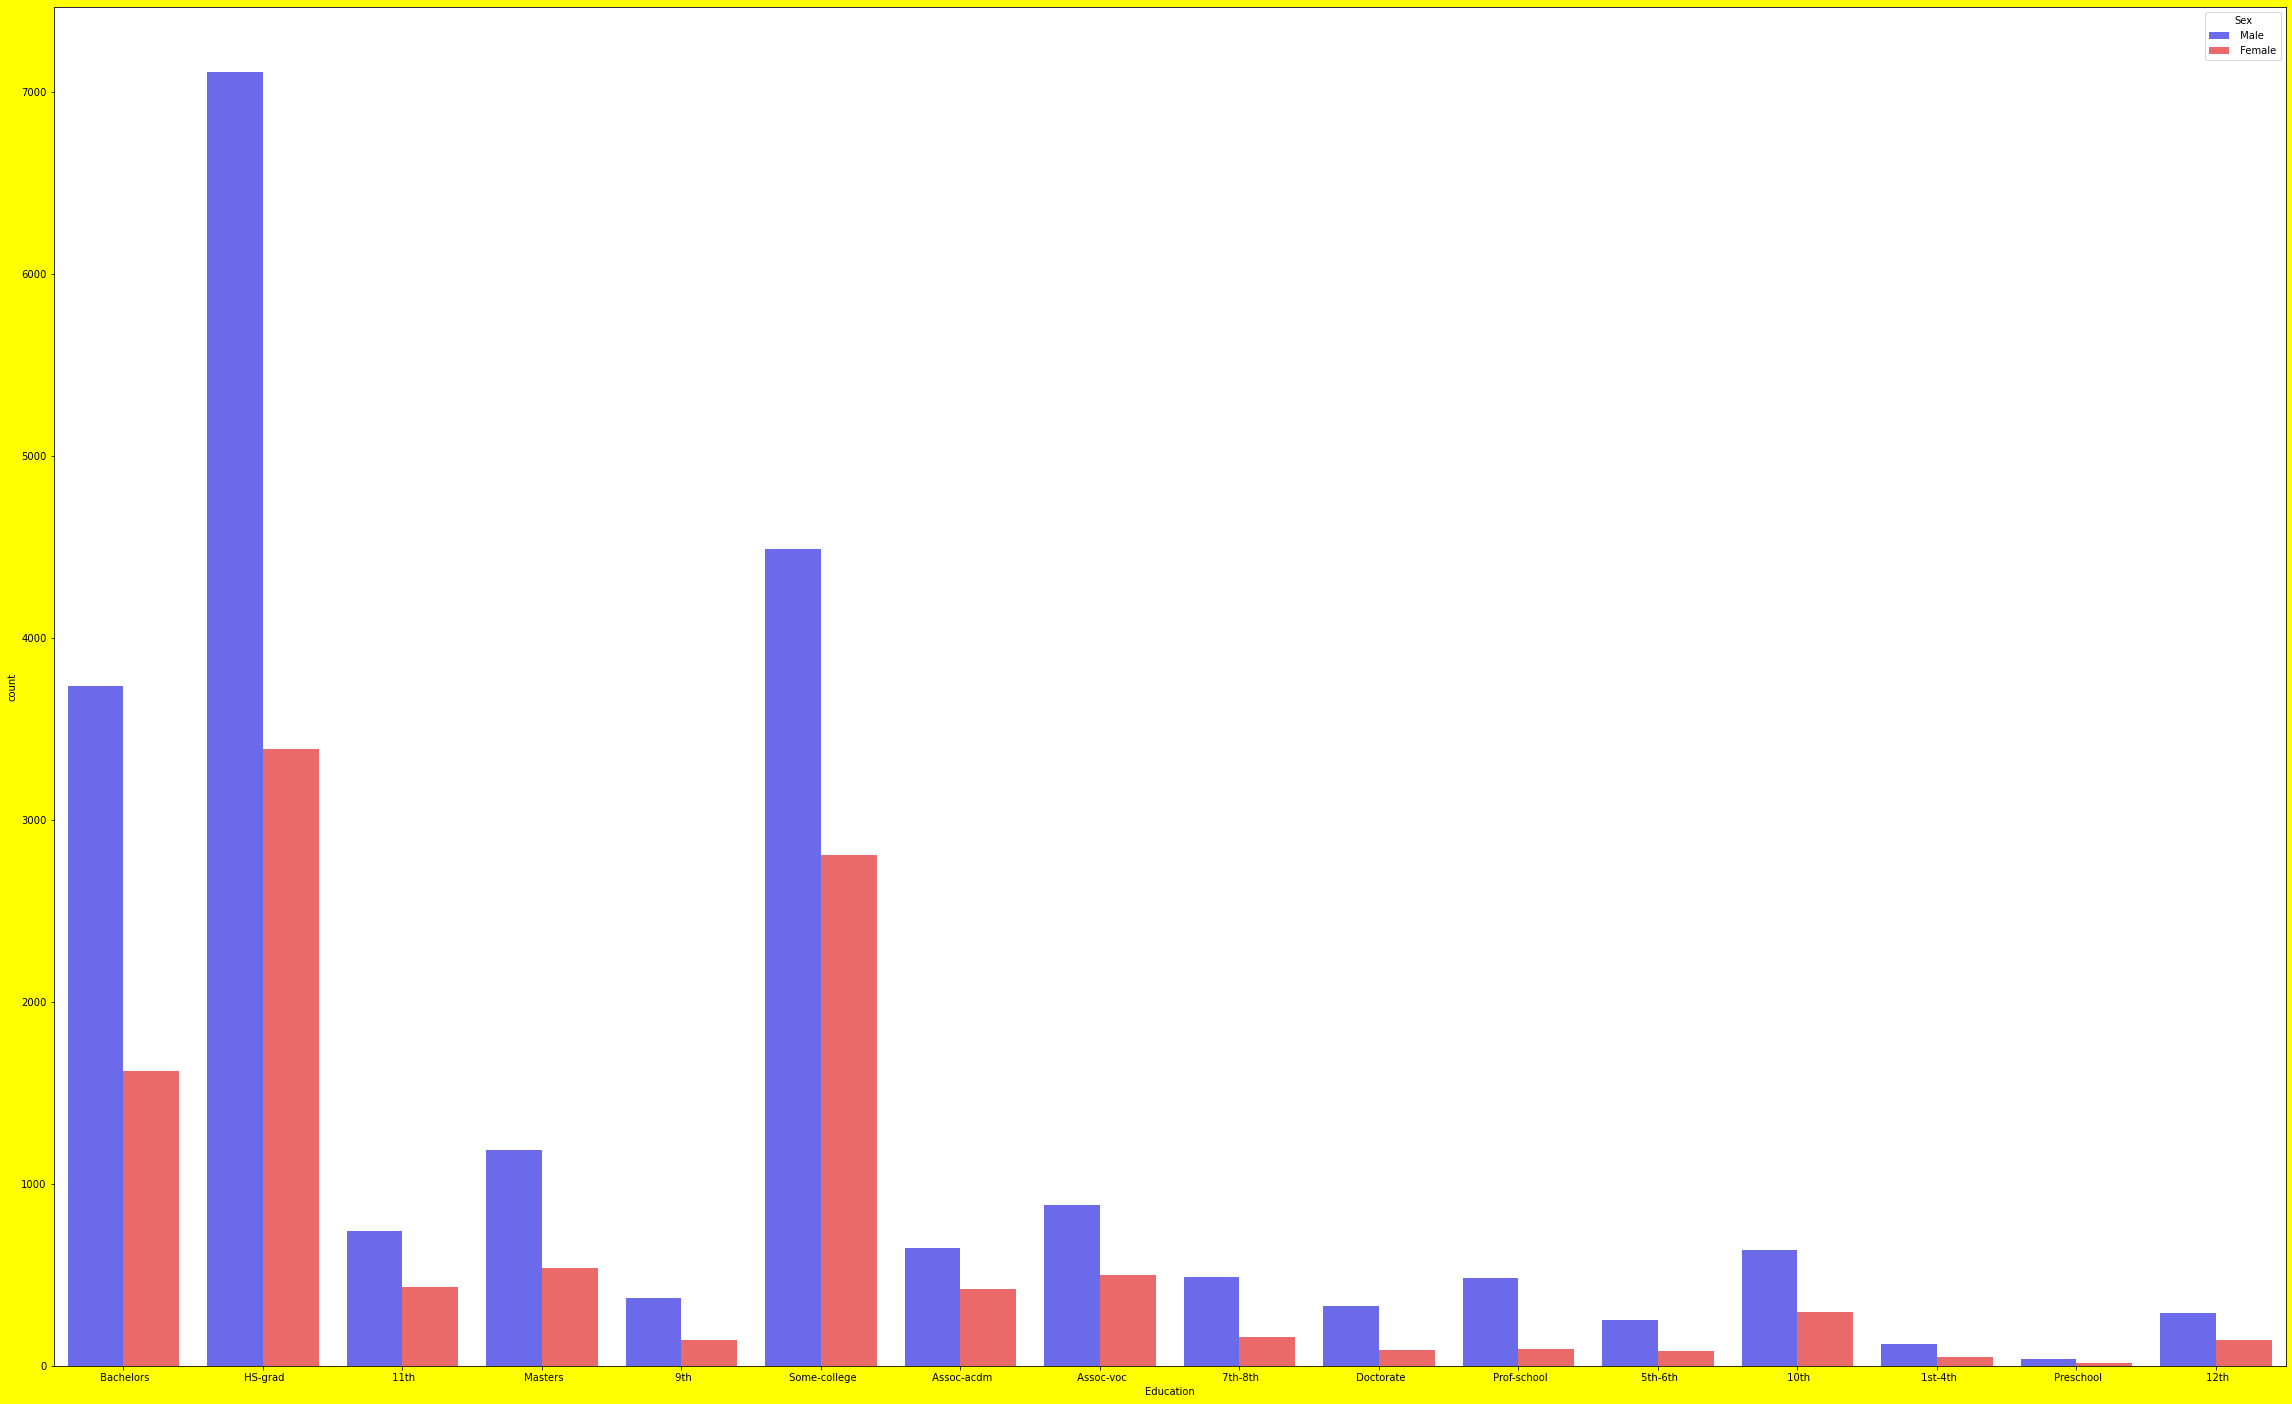

In [60]:
#countplot
plt.figure(figsize=(40,25),facecolor="yellow")
sns.countplot(df['Education'], hue='Sex', data=df, palette='seismic');

### Encoding the dataset using Label encoder

In [61]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [62]:
#encoding my dataset for categorical variables
df1= df.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,33,6,2925,9,12,2,4,0,4,1,0,0,12,39,0
1,21,4,14085,11,8,0,6,1,4,1,0,0,39,39,0
2,36,4,15335,1,6,2,6,0,2,1,0,0,39,39,0
3,11,4,19354,9,12,2,10,5,2,0,0,0,39,5,0
4,20,4,17699,12,13,2,4,5,4,0,0,0,39,39,0


### Removing outliers by z-score method

In [63]:
#Removing Outliers
from scipy import stats

z = np.abs(stats.zscore(df1))
index = (np.where(z > 3)[0])

df1 = df1.drop(df1.index[index])

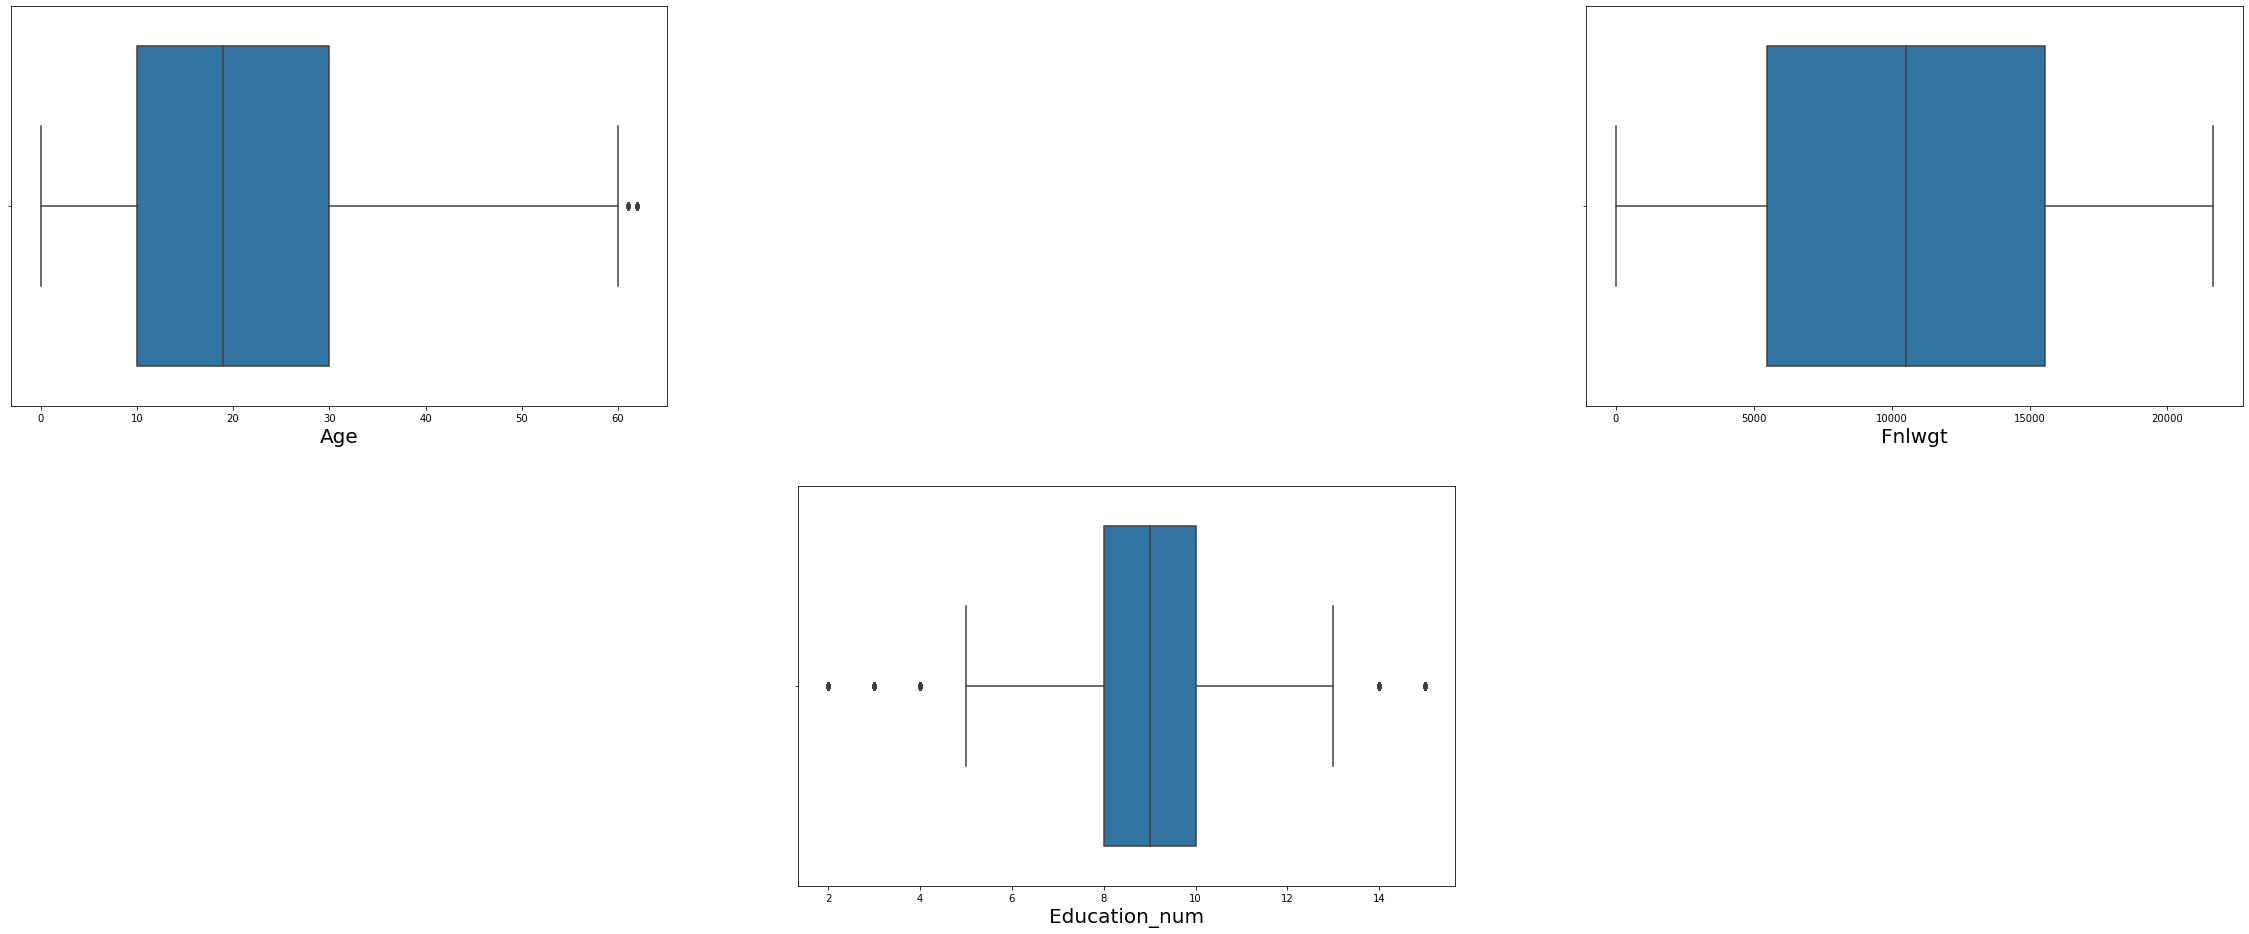

In [64]:
#plotting distribution plot for my dataframe removing outliers
plt.figure(figsize=(40,25),facecolor="white")
plotnumber = 1

for column in df1:
    
    if(df1[column].dtype == np.float64 or df1[column].dtype == np.int64):
        if plotnumber<=9:
            ax = plt.subplot(3,3,plotnumber)
            sns.boxplot(df1[column])
            plt.xlabel(column,fontsize=20)
       
    plotnumber +=1
plt.show()


### Spliting the dataset

In [65]:
#splitting mydataset
X= df1.drop(['Income'], axis=1)
y = df1['Income']

In [66]:
#scaling mydata
Scale= StandardScaler().fit_transform(df1.drop('Income', axis=1))

In [67]:
#checking for is there any VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = Scale

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [68]:
vif

,VIF,Features
0,1.174871,Age
1,1.090026,Workclass
2,1.031926,Fnlwgt
3,1.158347,Education
4,1.216984,Education_num
5,1.141882,Marital_status
6,1.090535,Occupation
7,1.650598,Relationship
8,1.052499,Race
9,1.522469,Sex


In [69]:
from sklearn.decomposition import PCA

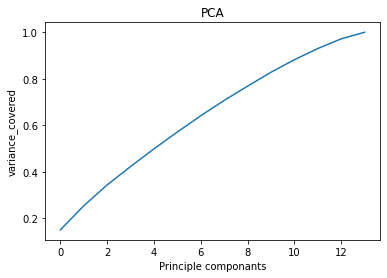

In [70]:
pca = PCA()
pca.fit_transform(Scale)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principle componants')
plt.ylabel('variance_covered')
plt.title('PCA')
plt.show()

In [71]:
#splitting my data to train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Scale, y, test_size=0.25, random_state=40)

In [77]:
# build different machine learning models with the same random state if applicable
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,roc_curve, roc_auc_score

lr = LogisticRegression(random_state = 6)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 6)
dt = DecisionTreeClassifier(random_state = 6)
xg = xgb.XGBClassifier(random_state = 6)


In [78]:
# naive approach on each models without hyperparameter tuning
from sklearn.model_selection import cross_val_score,KFold
model_list = [lr,knn,rf,dt,xg]
score_res = []
for model in model_list:
    draft = cross_val_score(model, X_train, y_train, cv = 5)
    score_res.append(draft)

In [79]:
# print out naive approach performance
model_names = ['Logistic Regression', 'KNN', 'Random Forest','Decision Tree','XG Boost']
idx = ['cv_1','cv_2','cv_3','cv_4','cv_5']
df_accuracy = pd.DataFrame(np.array(score_res).T, columns = model_names, index = idx).round(decimals=3)
print('='*60)
print('The Score is listed below \n\n',df_accuracy)
print('='*60)

The Score is listed below 

       Logistic Regression    KNN  Random Forest  Decision Tree  XG Boost
cv_1                0.830  0.830          0.839          0.792     0.854
cv_2                0.835  0.836          0.852          0.801     0.866
cv_3                0.824  0.829          0.846          0.795     0.853
cv_4                0.836  0.831          0.843          0.798     0.852
cv_5                0.828  0.837          0.845          0.804     0.854
Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\shailja tiwari\\AppData\\Roaming\\Python\\Python39\\site-packages\\xgboost\\lib\\xgboost.dll'
Check the permissions.



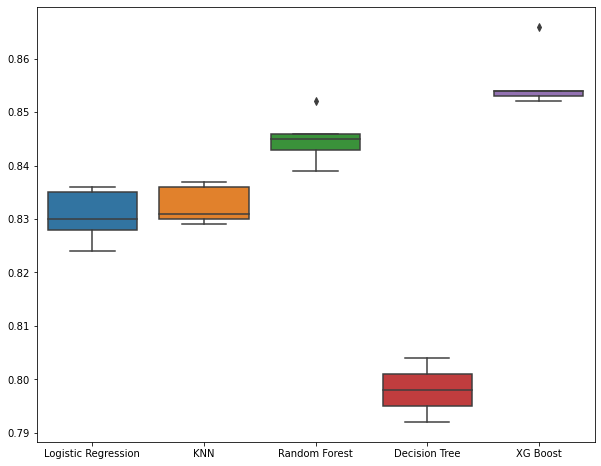

In [80]:
# visualize the performance of different machine learning models
plt.figure(figsize=(10, 8))
sns.boxplot(data = df_accuracy)
plt.savefig('draft.png');

In [81]:
# helper function to get best parameters from best model after grid search cross validation
best_models = []
def get_grid_res(gs):
    print("Best Score:", "{:.3f}".format(gs.best_score_))
    print("Best Parameters:")
    best_params = gs.best_params_
    for k, v in best_params.items():
        print(k, ":", v)

In [82]:
# set kfold number for k fold cross validation method
kfold = KFold(n_splits=10, random_state = 6,shuffle=True)

In [83]:
# hyperparameter tuning for logistic regression
lr_params = {'penalty':('l1', 'l2'), 
          'C':(0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10)}

# apply grid search on each hyperparameter and fit in with data
grid_lr = GridSearchCV(lr, lr_params, cv= kfold)
grid_lr.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=LogisticRegression(random_state=6),
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10),
                         'penalty': ('l1', 'l2')})

In [84]:
lr_res = grid_lr.cv_results_

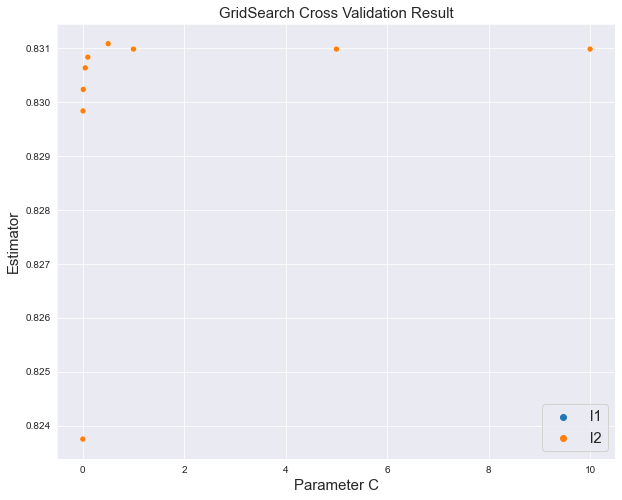

In [85]:
# visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'param_C', y = 'mean_test_score',hue = 'param_penalty',data = lr_res)
plt.xlabel('Parameter C',fontsize = 15)
plt.ylabel('Estimator',fontsize = 15)
plt.title('GridSearch Cross Validation Result',fontsize = 15)
plt.legend(fontsize = 15)
plt.savefig('LR.png');

In [86]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_lr)

Best Score: 0.831
Best Parameters:
C : 0.5
penalty : l2


In [87]:
best_lr_model = grid_lr.best_estimator_
# append the best model to the list for other evalution
best_models.append(('Logistic Regression', best_lr_model))

In [88]:
# hyperparameter tuning for K nearest neighbors
knn_params = {
    'n_neighbors':[3,5,7,9,11,13,15,17,21,31,59,61,63] 
}

In [89]:
# apply grid search on each hyperparameter and fit in with data
grid_knn = GridSearchCV(knn, knn_params, cv= kfold)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 21, 31, 59,
                                         61, 63]})

In [90]:
knn_res = grid_knn.cv_results_

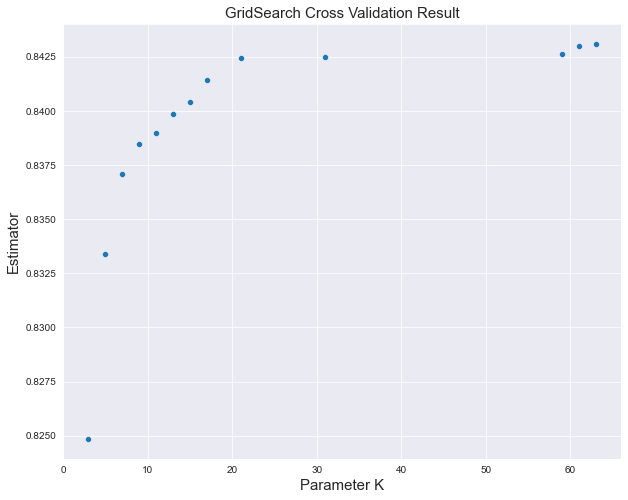

In [91]:
# visualize the affect of different hyperparameters on performance
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))
sns.scatterplot(x = 'param_n_neighbors', y = 'mean_test_score',data = knn_res)
plt.xlabel('Parameter K',fontsize = 15)
plt.ylabel('Estimator',fontsize = 15)
plt.title('GridSearch Cross Validation Result',fontsize = 15)
plt.savefig('knn.png');

In [92]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_knn)

Best Score: 0.843
Best Parameters:
n_neighbors : 63


In [93]:
best_knn_model = grid_knn.best_estimator_

In [94]:
 # append the best model to the list for other evalution
best_models.append(('K Nearest Neighbors',best_knn_model))

In [96]:
# hyperparameter tuning for random forest
params_rf = {
    'n_estimators': [20,40,60,80],
    'min_samples_split':[4,6,8],
    'max_depth': [1, 5, 10, 15],
    'max_features': ['sqrt', 'auto','log2']
}
grid_rf = GridSearchCV(rf,params_rf, cv=kfold)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=RandomForestClassifier(random_state=6),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [20, 40, 60, 80]})

In [97]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_rf)

Best Score: 0.855
Best Parameters:
max_depth : 15
max_features : sqrt
min_samples_split : 6
n_estimators : 60


In [98]:
rf_res = grid_rf.cv_results_

In [99]:
best_rf_model = grid_rf.best_estimator_

In [100]:
# append the best model to the list for other evalution
best_models.append(('Random Forest', best_rf_model))

In [101]:
# hyperparameter tuning for decision tree
params_dt = {
    'max_depth':[1,5,10,15],
    'min_samples_split':[2,4,6,8,10]
}
grid_dt = GridSearchCV(dt,params_dt, cv=kfold)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=6),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [102]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_dt)

Best Score: 0.847
Best Parameters:
max_depth : 5
min_samples_split : 10


In [103]:
best_dt_model = grid_dt.best_estimator_

In [104]:
# append the best model to the list for other evalution
best_models.append(('Decision Tree', best_dt_model))

In [105]:
# hyperparameter tuning for extreme boosting tree aka xgboost
params_xgb = {
        'subsample': [0.4, 0.6, 0.8],
        'max_depth': [1,5,10,15],
        'n_estimators':[40,60,80],
        'reg_alpha':[0.01, 0.05, 0.1, 0.5, 1, 5],
        'reg_lambda':[0.01, 0.05, 0.1, 0.5, 1, 5],
        'eta':[0.4,0.6,0.8],
        'learning_rate':[0.1, 0.3, 0.5]
        }

In [106]:
from sklearn.model_selection import RandomizedSearchCV
grid_xgb = RandomizedSearchCV(xg, params_xgb,cv = kfold,n_iter = 100)
grid_xgb.fit(X_train, y_train) 

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=6,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=100,
                   param_distributions={'eta': [0.4, 0.6, 0.8],
                                        'learning_rate': [0.1, 0.3, 0.5],
                                        'max_depth': [1, 5, 10, 15],
                                        'n_estimators': [40, 60, 80],
                                        'reg_alpha': [0.01, 0.05, 0.1, 0.5, 1,
                                                      5],
                                        'reg_lambda': [0.01, 0.05, 0.1, 0.5, 1,
                                                       5],
                                        'subsample': [0.4, 0.6, 0.8]})

In [107]:
# apply helper function to get the best hyperparameter
get_grid_res(grid_xgb)

Best Score: 0.861
Best Parameters:
subsample : 0.4
reg_lambda : 1
reg_alpha : 0.01
n_estimators : 80
max_depth : 5
learning_rate : 0.1
eta : 0.8


In [108]:
best_xgb_model = grid_xgb.best_estimator_

In [109]:
# append the best model to the list for other evalution
best_models.append(('Extreme Boosting Tree', best_xgb_model))

In [110]:
# print out the list of optimized models
for name,model in best_models:
    print(name)

Logistic Regression
K Nearest Neighbors
Random Forest
Decision Tree
Extreme Boosting Tree


In [111]:
# helper function to print out and visualize the evaluation result of each model including
# confusion matrix, precison-recall and f1 score
def plot_cm(models):
    sns.set_style('white')
    class_names = ['No','Yes']
    for model_name, model in models:
        cm = confusion_matrix(y_test,model.predict(X_test))
        tn = cm[0][0]
        fp = cm[0][1]
        fn = cm[1][0]
        tp = cm[1][1]
        accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
        precision = tp / (tp + fp + 0.0)
        recall = tp / (tp + fn + 0.0)
        f1 = 2 / (( 1 / precision) + ( 1 / recall))
        plot_confusion_matrix(model, X_test, y_test,
                              display_labels=class_names,
                              cmap="Oranges")
        plt.title(model_name, fontsize = 15)
        plt.ylabel('Actual',fontsize = 15)
        plt.xlabel('Predicted\nAccuracy = {}\nPrecision = {}\nRecell = {}\nF1 = {}'
                   .format((round(accuracy, 3)),round(precision, 3),round(recall, 3),round(f1, 3)), fontsize = 15)

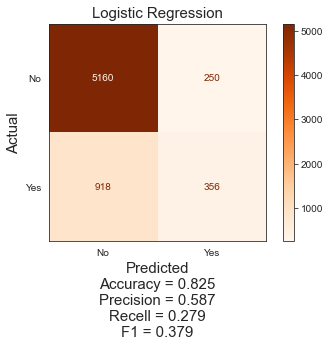

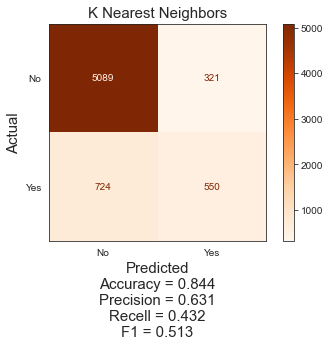

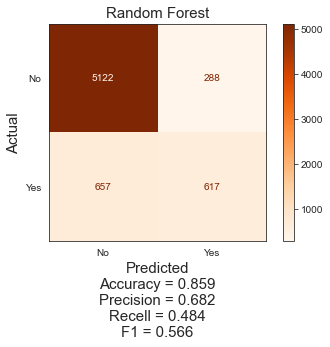

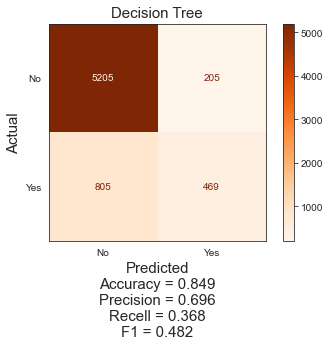

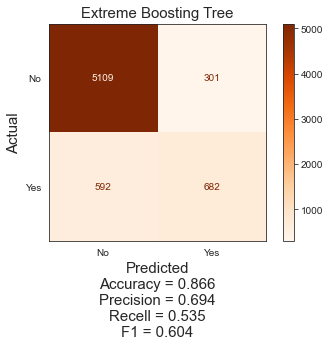

In [112]:
plot_cm(best_models)
plt.savefig('cm.png')

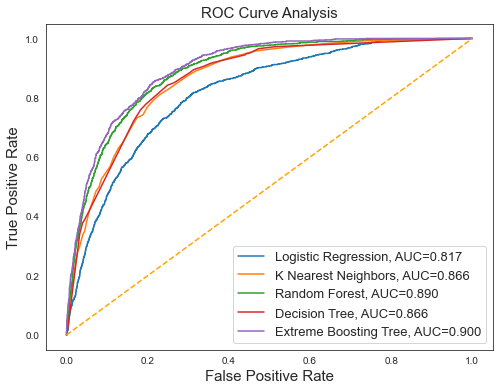

In [113]:
# visualize ROC curve for each optimized model
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
for model_name, model in best_models:
        yproba = model.predict_proba(X_test)[::,1]

        fpr, tpr, _ = roc_curve(y_test,  yproba)
        auc = roc_auc_score(y_test, yproba)
        result_table = result_table.append({'classifiers':model_name,
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)

    # Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=15)
plt.ylabel("True Positive Rate", fontsize=15)
plt.title('ROC Curve Analysis',fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.savefig('ROC.png');


In [114]:
# Fit the model on training set
import pickle
model =xgb.XGBClassifier()
model.fit(X_train, y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8608617594254937
